In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt, seaborn as sns
os.listdir('../input/survey-data')

['Survey on Smart Contract.csv']

In [107]:
data = pd.read_csv('../input/survey-data/Survey on Smart Contract.csv')
data.drop('Timestamp', axis=1, inplace=True)
data.head()

,Do you currently work in supply chain related IT company?,Can you select one of the option below that best fits your business experience in IT?,Do you feel the current supply chain applications are failing due to lack of technology innovations in the field?,Do you think supply chain management systems current need better technology?,"Do you think the current issues faced by supply chain management systems are vastly related to visibility, traceability and efficiency in real time tracking operation?",Do you have knowledge on Smart Contract Application that work based on the blockchain technology?,Do you think the decentralised structure of blockchain technology can be used in eliminating some of the current issues in supply chain?,Do you think having a technology that eliminates the involvement of third parties in supply chain can improve the efficiency in the system?,Do you think there can be legal compliance issue of using technologies like blockchain in different locations?,Have ever proposed new technology in you workplace that can improvise the supply chain system?,Have you been part of implementing any new technology related to supply chain?,Do you think adopting new technology in supply chain is easier process compared to other fields of business?
0,Yes,11 and above,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
1,No,3-5 years,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
2,Yes,11 and above,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes
3,Yes,6-10 years,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
4,Yes,6-10 years,No,Yes,No,No,Yes,Yes,No,No,No,No


In [108]:
cols = ['Currently work in SC', 'Business experience', 'Lack of tech innovations',
        'Need better technology', 'Real time Tracking', 'Knowledge of smart contract','Elimination current issues',
         'Eliminating third parties', 'Legal compliance', 'Proposed new technology', 
         'Implementing new technology', 'Adopting new technology']

data.columns = cols

In [109]:
data.head().T

,0,1,2,3,4
Currently work in SC,Yes,No,Yes,Yes,Yes
Business experience,11 and above,3-5 years,11 and above,6-10 years,6-10 years
Lack of tech innovations,No,Yes,Yes,Yes,No
Need better technology,Yes,Yes,Yes,Yes,Yes
Real time Tracking,Yes,Yes,Yes,Yes,No
Knowledge of smart contract,No,Yes,No,No,No
Elimination current issues,Yes,Yes,Yes,Yes,Yes
Eliminating third parties,Yes,Yes,No,Yes,Yes
Legal compliance,Yes,Yes,Yes,Yes,No
Proposed new technology,Yes,No,Yes,Yes,No


In [110]:
data.shape

(16, 12)

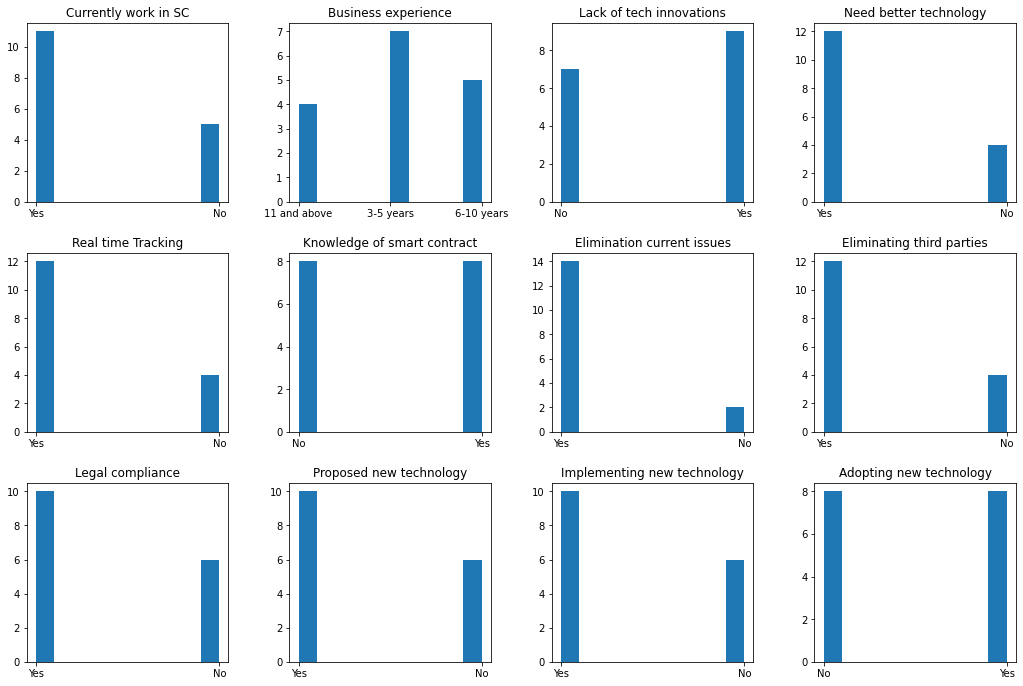

In [111]:
fig, ax = plt.subplots(3, 4, figsize = (15 ,10))
plt.tight_layout(pad = 3)
count = 0
for i in range(3):
    for j in range(4):
        ax[i,j].hist(data[cols[count]]); ax[i,j].set_title(cols[count])
        count += 1

From the above plot it shows the participants have strong agreement on the following statements:
* Eliminating current issues
* Eliminating third parties
* Real-time tracking

however, the participants have 50:50 opinions on adopting new technology in the supply chain IT domain.  This needs more participants to ascertain the conscientious conclusion.

Let's analyze further to obtain more insights. 

In [117]:
data_num = data.apply(LabelEncoder().fit_transform)

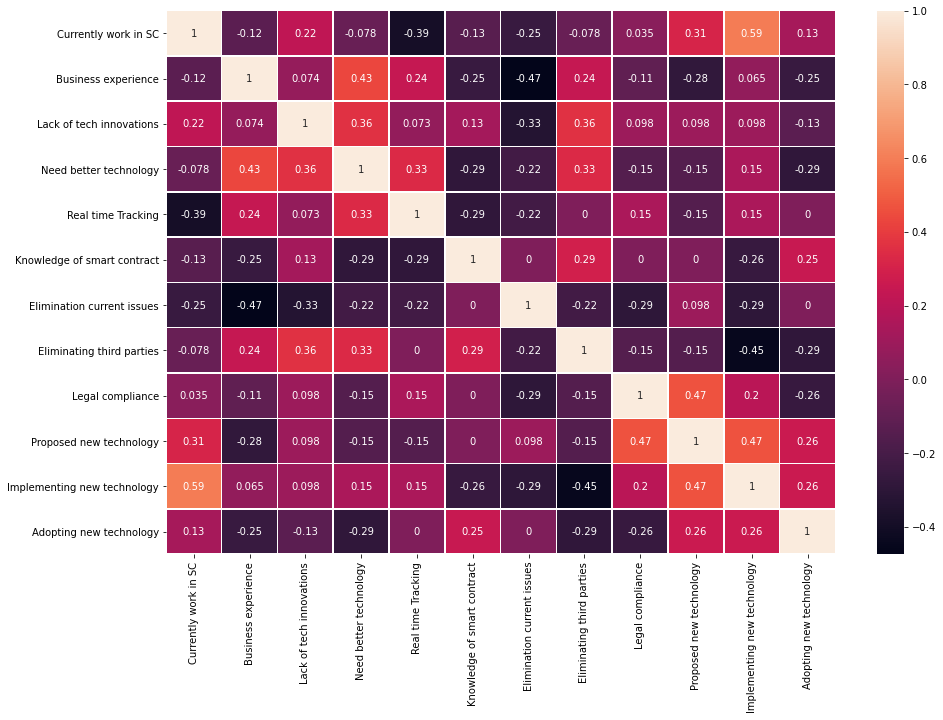

In [128]:
plt.figure(figsize = (15,10))
corr = data_num.corr()
sns.heatmap(corr, annot = True, linewidths=.5);

The correlation matrix is very evident that the participant who is currently working in SC and experience with IT, has shown strong endorse towards implementing new technology and need better technology, this shows that there's a huge scope of improvement and innovation.

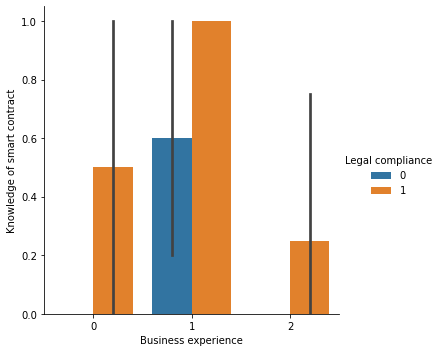

In [166]:
df_t = data_num[['Currently work in SC', 'Business experience', 'Adopting new technology']]

sns.catplot(x="Business experience", y="Knowledge of smart contract", hue="Legal compliance", kind="bar", data=data_num);

The confidence interval shows that participants with experience and knowledge in smart contract strongly agree there will be a legal compliance issue in implementing block chain across the locations


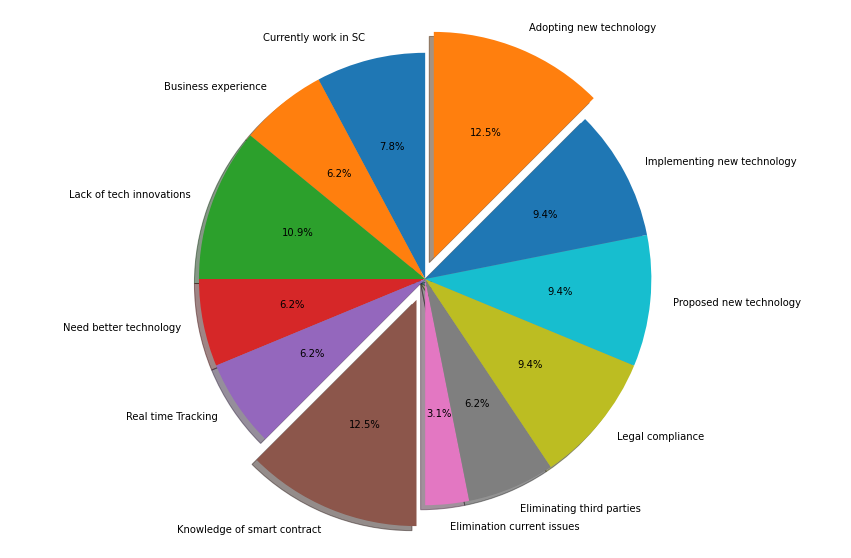

In [216]:
sur_no = (data_num[cols] == 0).sum()
sizes = sur_no.values
labels = cols
explode = (0,0,0,0,0,0.1,0,0,0,0,0,0.1)
fig1, ax1 = plt.subplots(figsize = (15, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The pie chart shows the participants who voted No

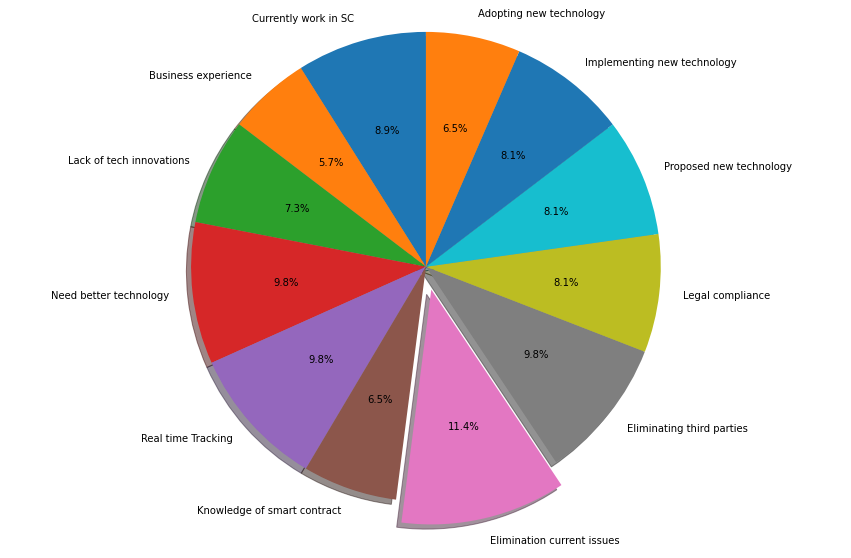

In [222]:
sur_no = (data_num[cols] == 1).sum()
sizes = sur_no.values
labels = cols
explode = (0,0,0,0,0,0,0.1,0,0,0,0,0)
fig1, ax1 = plt.subplots(figsize = (15, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The pie chart shows the participants who voted Yes

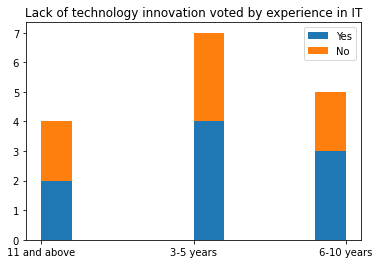

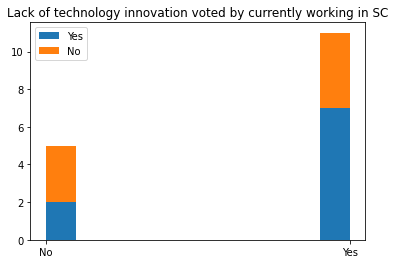

In [257]:
y_vote = data_num['Business experience'][data_num['Lack of tech innovations'] == 1]
n_vote = data_num['Business experience'][data_num['Lack of tech innovations'] == 0]

plt.hist([y_vote, n_vote], stacked=True, label=['Yes', 'No'])
plt.legend()
plt.title('Lack of technology innovation voted by experience in IT')
plt.xticks(np.arange(3), labels=['11 and above', '3-5 years', '6-10 years'])
plt.show()

y_vote = data_num['Currently work in SC'][data_num['Lack of tech innovations'] == 1]
n_vote = data_num['Currently work in SC'][data_num['Lack of tech innovations'] == 0]

plt.hist([y_vote, n_vote], stacked=True, label=['Yes', 'No'])
plt.legend()
plt.title('Lack of technology innovation voted by currently working in SC')
plt.xticks(np.arange(2), labels=['No', 'Yes', ])
plt.show()



The first stacked bar is showing some interesting insights, participants with 11 and above have 50:50 ratio, which is surprising, on the other hand, the majority of the other two categories have agreed that SC is lacking innovation.

The second stacked bar is quiet clear that participants who are currently working in SC are in agreement with the statement, those who are not currently working with SC voted they do not think it is true.  

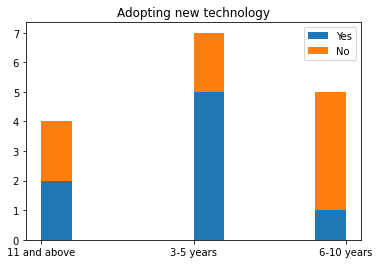

In [248]:
y_vote = data_num['Business experience'][data_num['Adopting new technology'] == 1]
n_vote = data_num['Business experience'][data_num['Adopting new technology'] == 0]

plt.hist([y_vote, n_vote], stacked=True, label=['Yes', 'No'])
plt.legend()
plt.title('Adopting new technology')
plt.xticks(np.arange(3), labels=['11 and above', '3-5 years', '6-10 years'])
plt.show()

Let's take two categories here into consideration (11 years + and 6-10 years) if we analyze the data, out of 9 participants, 6 have denied that adopting new technology is not easy. We can fairly conclude that the former is True.
